# Linear Classifiers convergence

After multiple execution for three different linear classifiers we will check which case is capable to converge to an stable values for theta and theta_0

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  

# linear classifiers algorithms
import project1 as p1
import utils

Load data to be treated

In [2]:
toy_features, toy_labels = toy_data = utils.load_toy_data('toy_data.tsv')

In [3]:
def conv_eval(x_matrix, y_array, lc_method, T_max, T_step = 10):
    '''
    Calculate results over several iterations steps and return an array with results for a define method
    Inputs
    x_matrix :       array with data to be treated
    y_array :        vector with labels for each feacture vector
    T_max :          integer, max number of allowed iterations
    T_step :         integer, step magnitude for converge vector iteration
    lc_method :      string, select the algorithm to execute ['pegasos', 'perceptron' (default), 
                                                              'perceptron_avg']
    
    Outputs
    theta_matrix :   array with the history of all results for each iteration
    theta_0_matrix:  array with the history of all theta_0 results for each iteration
    T_array :        array with the number of iteration execute at each evaluation
    '''
    
    T_min = 10
    L = .2 # lambda value for linear classifier execution
    T_array = np.arange(T_min, T_max, T_step)
    
    # define linear classifier method
    if lc_method is 'perceptron':
        lc_fun = lambda x, y, T, L: p1.perceptron(x, y, T)
        
    elif lc_method is 'perceptron_avg':
        lc_fun = lambda x, y, T, L: p1.average_perceptron (x, y, T)
        
    elif lc_method is 'pegasos':
        lc_fun = lambda x, y, T, L : p1.pegasos(x, y, T, L)
        
    else:
        raise NoWellDefineVariable_lc_method
    
    for pos, T in enumerate(T_array):
        # execute the algorihtm
        sol = lc_fun(x_matrix, y_array, T, L)

        # initialize var for results gathering
        if pos == 0:
            th_array = np.zeros((len(T_array), sol[0].shape[0]))
            th_0_array = np.zeros(len(T_array))

        # store results
        th_array[pos, :] = sol[0]
        th_0_array[pos] = sol[1]
    
    return th_array, th_0_array, T_array

In [4]:
th_array, th_0_array, T_vec = conv_eval(toy_features, toy_labels, 'perceptron', 101)

Define a function to plot theta as a function of the iteration

In [5]:
def plot_theta_vs_iteration(th_array, th_0_array, T_vec, t_text = 'Method convergence'):
    fig, axs = plt.subplots(th_array.shape[1]+1, 1, figsize=[10, 5 * (th_array.shape[1]+1)])
    fig.suptitle(t_text, fontsize=20)

    for idx, ax in enumerate(axs):
        if idx < th_array.shape[1]: # plot thetas results
            ax.plot(T_vec, th_array[:,idx], 'o-')
            ax.axhline(np.average(th_array[:,idx]), linestyle='dashed', color='darkgray')
            t_text = '\theta_'+str(idx+1)+' '
            ax.set_ylabel(r'$\theta$' + str(idx+1))
            ax.set_xlabel('Iterations')

        else: # plot theta_0 result
            ax.plot(T_vec, th_0_array, 'o-')
            ax.set_ylabel(r'$\theta_0$')
            ax.set_xlabel('Iterations')

Define the number of total iterations to execute

In [6]:
T_total = 201

## Perceptron algorithm

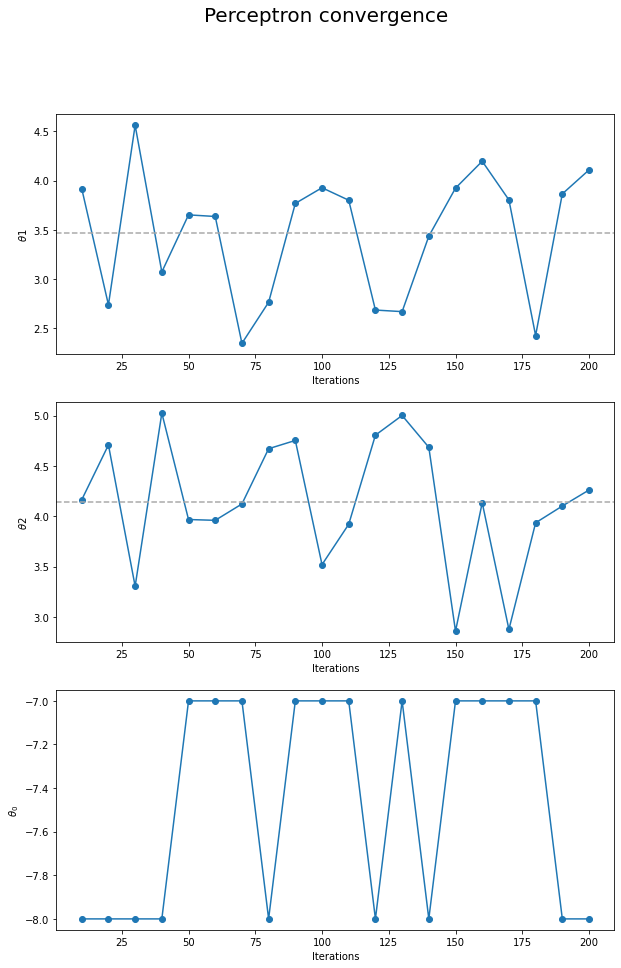

In [7]:
th_array, th_0_array, T_vec = conv_eval(toy_features, toy_labels, 'perceptron', T_total)
plot_theta_vs_iteration(th_array, th_0_array, T_vec, t_text = 'Perceptron convergence')

## Average Perceptron algorithm

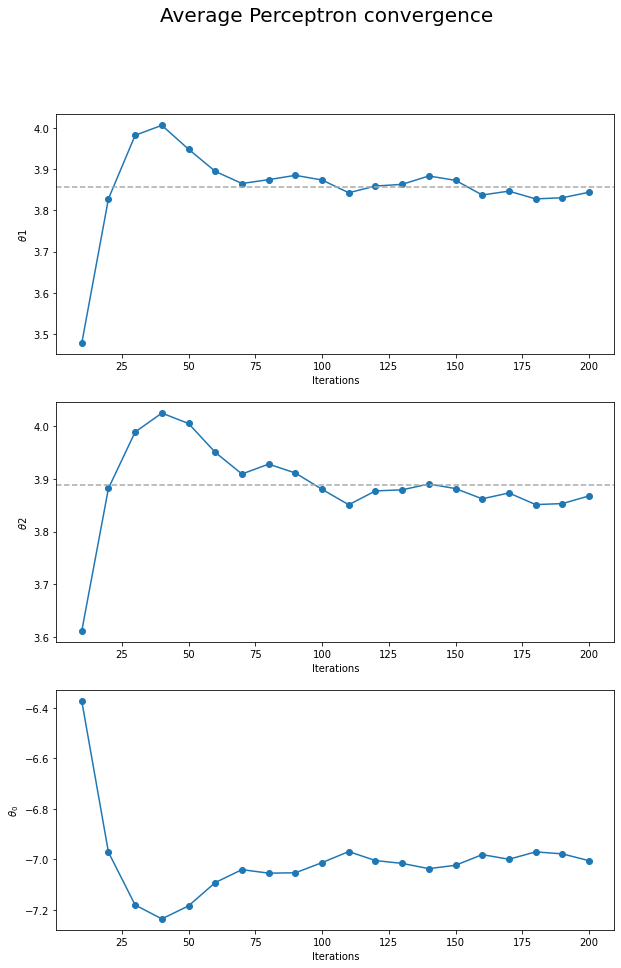

In [8]:
th_array, th_0_array, T_vec = conv_eval(toy_features, toy_labels, 'perceptron_avg', T_total)
plot_theta_vs_iteration(th_array, th_0_array, T_vec, t_text = 'Average Perceptron convergence')

## Pegasos algorithm

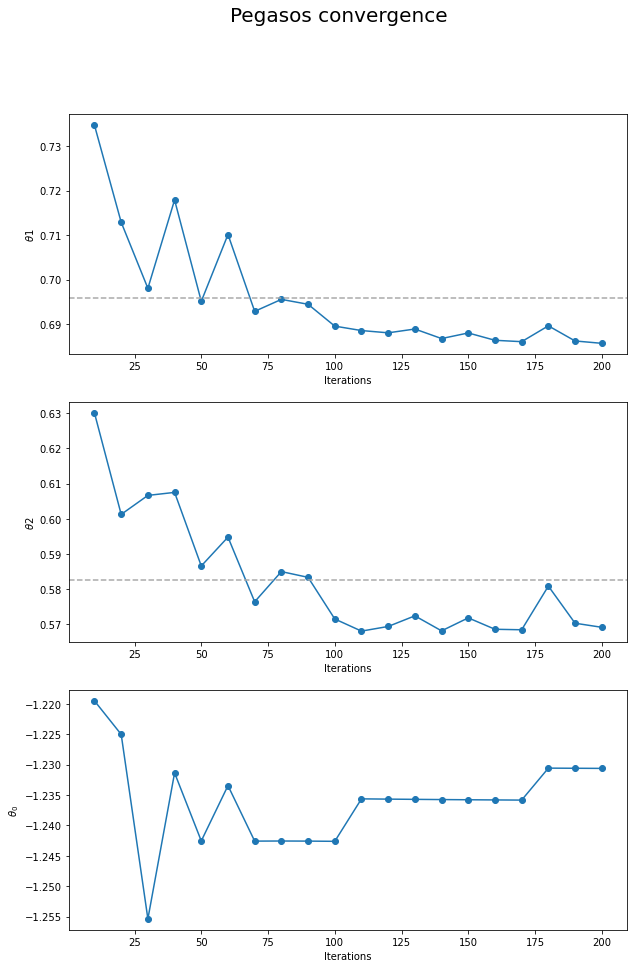

In [9]:
th_array, th_0_array, T_vec = conv_eval(toy_features, toy_labels, 'pegasos', T_total)
plot_theta_vs_iteration(th_array, th_0_array, T_vec, t_text = 'Pegasos convergence')